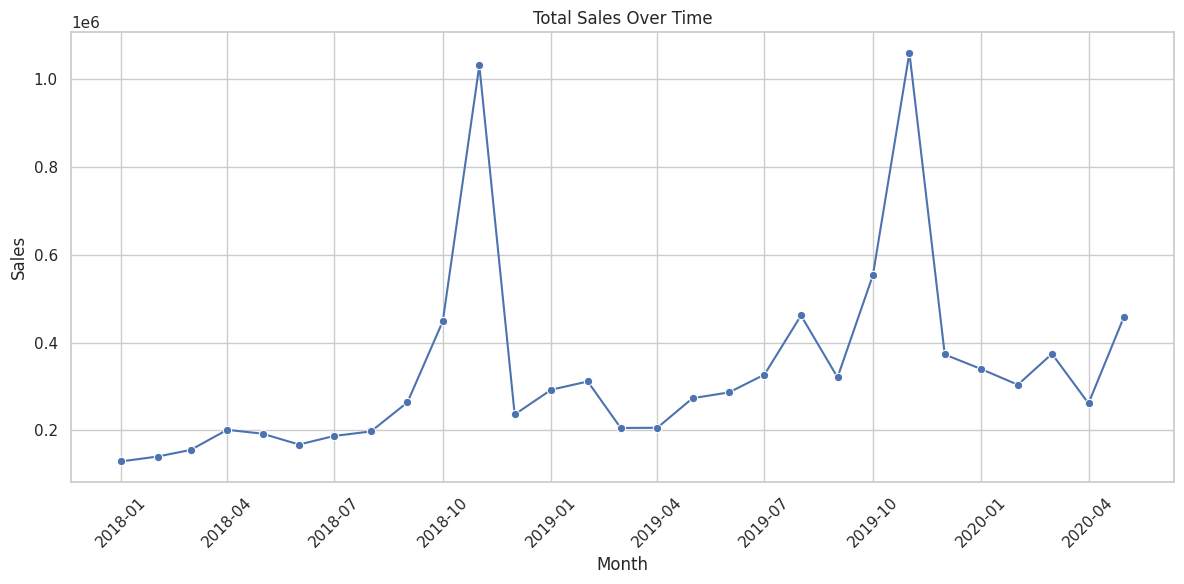

/tmp/ipykernel_103945/3025981369.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")


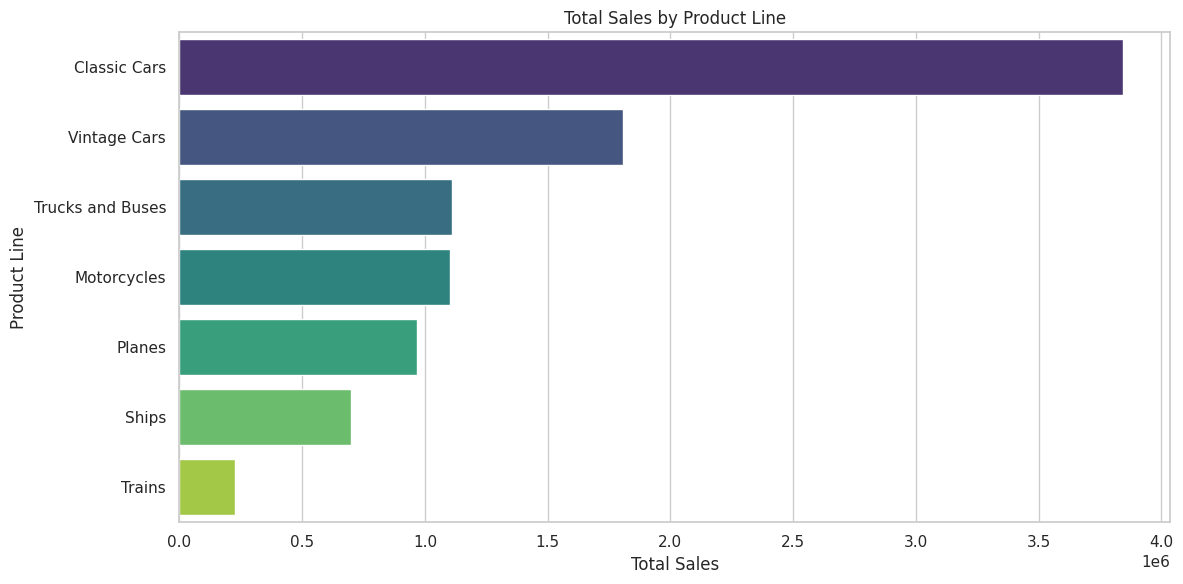

/tmp/ipykernel_103945/3025981369.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette="coolwarm")


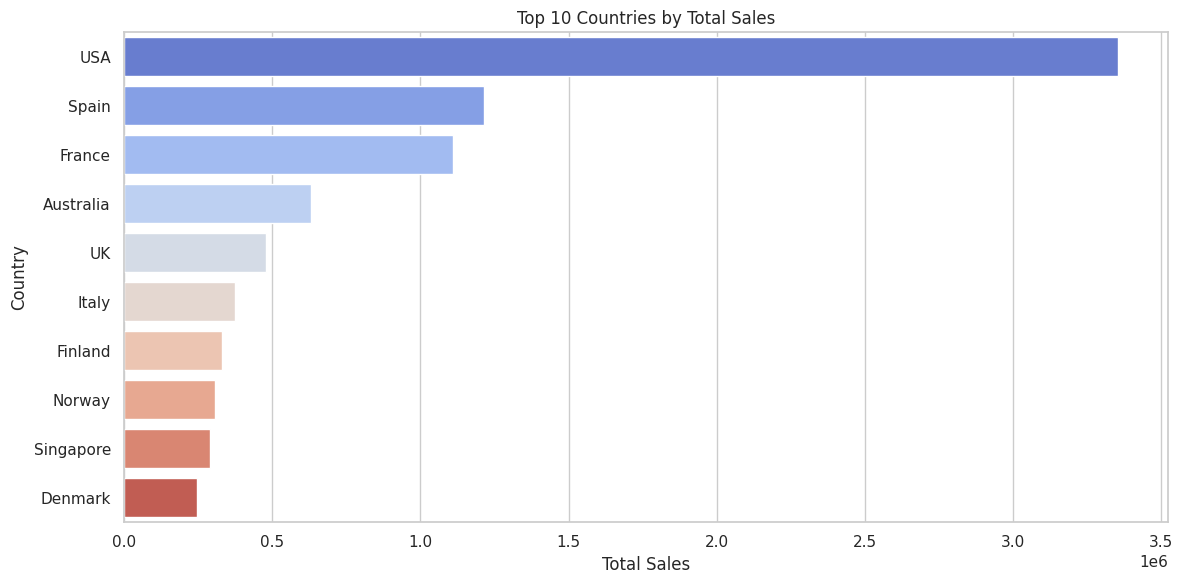

/tmp/ipykernel_103945/3025981369.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEALSIZE', y='SALES', data=df, order=['Small', 'Medium', 'Large'], palette="pastel")


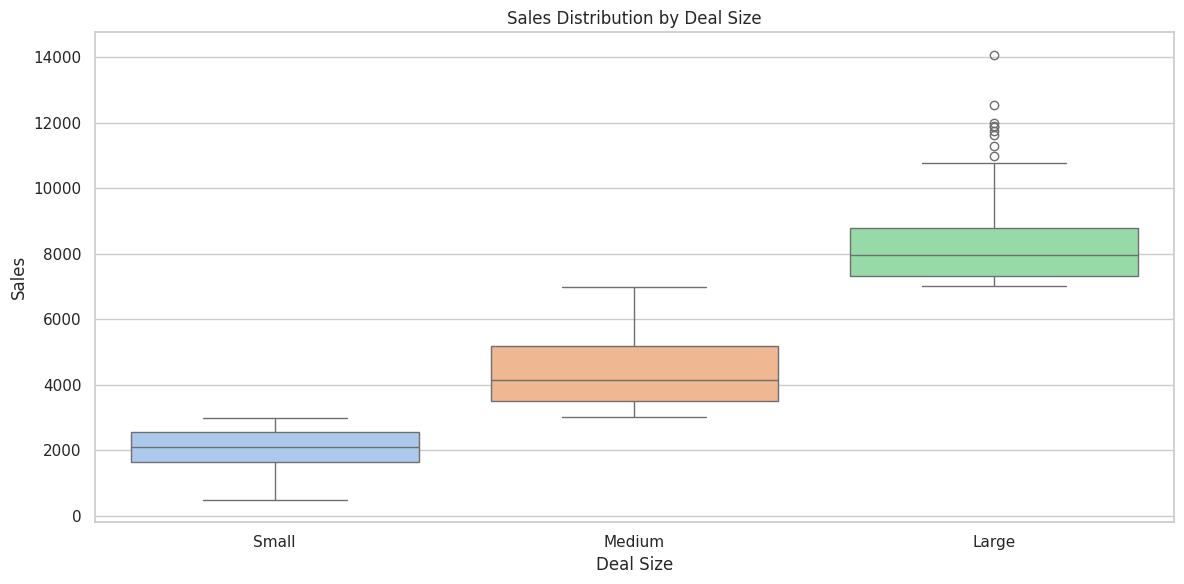

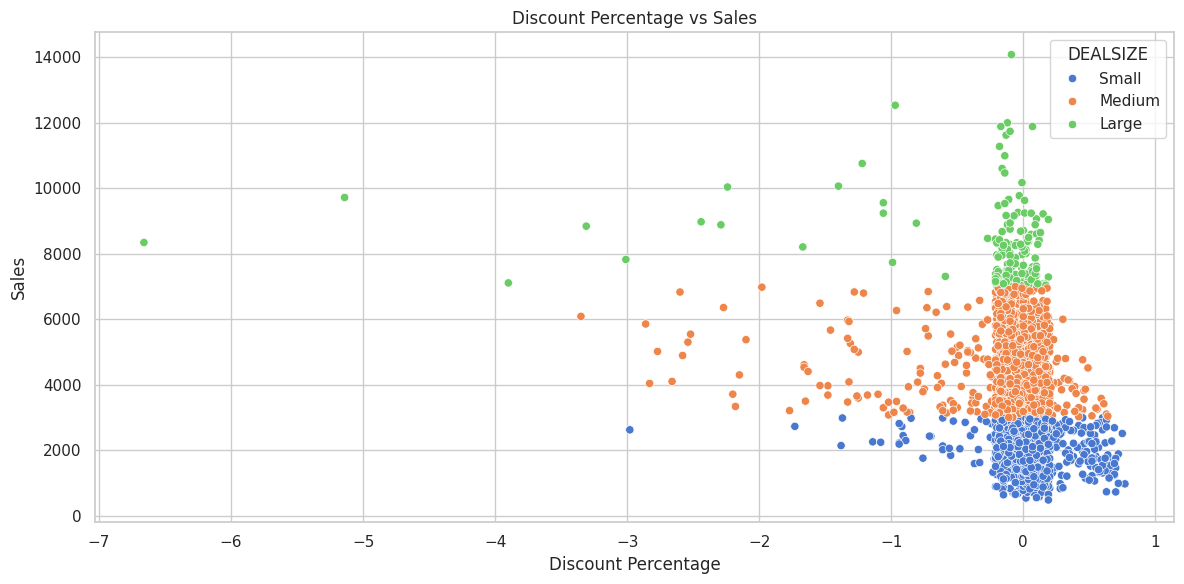

/tmp/ipykernel_103945/3025981369.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_labels, y=dow_sales.values, palette="Blues_d")


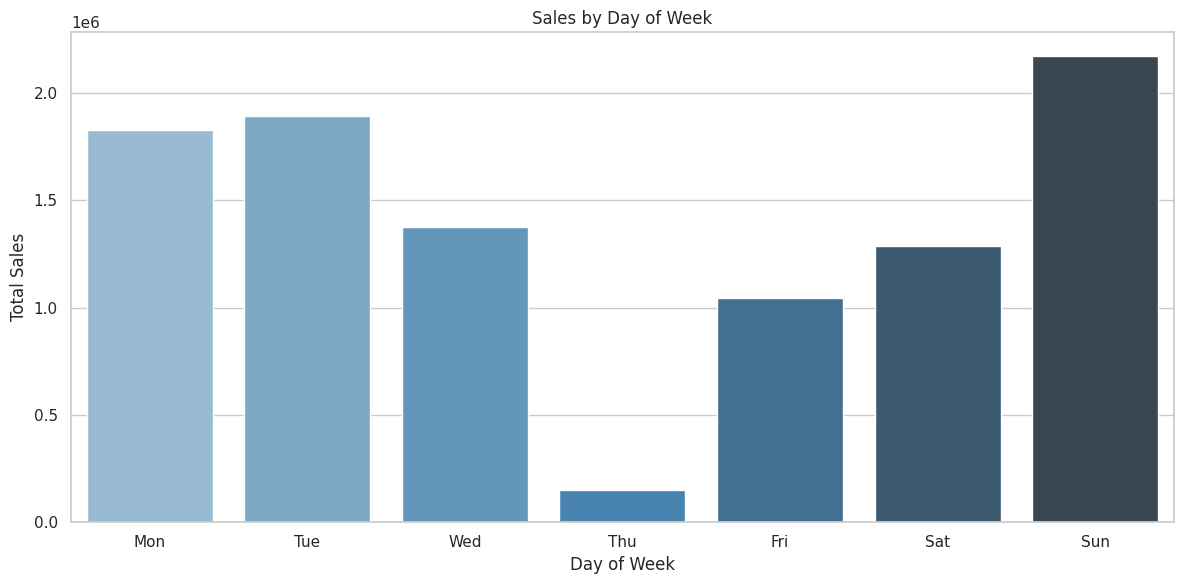

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display settings for charts
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv("Auto_Sales_Cleaned.csv")

# Convert ORDERDATE to datetime again
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum().reset_index()
monthly_sales['ORDERDATE'] = monthly_sales['ORDERDATE'].dt.to_timestamp()

plt.figure()
sns.lineplot(data=monthly_sales, x='ORDERDATE', y='SALES', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")
plt.title("Total Sales by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()

country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=country_sales.values, y=country_sales.index, palette="coolwarm")
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

plt.figure()
sns.boxplot(x='DEALSIZE', y='SALES', data=df, order=['Small', 'Medium', 'Large'], palette="pastel")
plt.title("Sales Distribution by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(data=df, x='DiscountPct', y='SALES', hue='DEALSIZE', palette='muted')
plt.title("Discount Percentage vs Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

dow_sales = df.groupby('DayOfWeek')['SALES'].sum()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure()
sns.barplot(x=dow_labels, y=dow_sales.values, palette="Blues_d")
plt.title("Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()
